Geometry: NDBR50, Epoch [100/1000], Loss: 0.0806
Geometry: NDBR50, Epoch [200/1000], Loss: 0.0750
Geometry: NDBR50, Epoch [300/1000], Loss: 0.0720
Geometry: NDBR50, Epoch [400/1000], Loss: 0.0696
Geometry: NDBR50, Epoch [500/1000], Loss: 0.0677
Geometry: NDBR50, Epoch [600/1000], Loss: 0.0659
Geometry: NDBR50, Epoch [700/1000], Loss: 0.0645
Geometry: NDBR50, Epoch [800/1000], Loss: 0.0633
Geometry: NDBR50, Epoch [900/1000], Loss: 0.0621
Geometry: NDBR50, Epoch [1000/1000], Loss: 0.0610
Geometry: NDBR6, Epoch [100/1000], Loss: 0.0764
Geometry: NDBR6, Epoch [200/1000], Loss: 0.0723
Geometry: NDBR6, Epoch [300/1000], Loss: 0.0698
Geometry: NDBR6, Epoch [400/1000], Loss: 0.0680
Geometry: NDBR6, Epoch [500/1000], Loss: 0.0665
Geometry: NDBR6, Epoch [600/1000], Loss: 0.0652
Geometry: NDBR6, Epoch [700/1000], Loss: 0.0640
Geometry: NDBR6, Epoch [800/1000], Loss: 0.0629
Geometry: NDBR6, Epoch [900/1000], Loss: 0.0619
Geometry: NDBR6, Epoch [1000/1000], Loss: 0.0609
Geometry: CHD6, Epoch [100/1

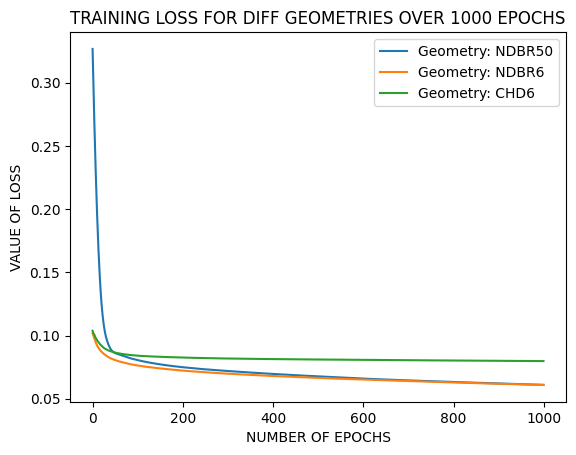

Predicted parameters for geometry NDBR50:
{'c1': 0.5303854942321777, 'c2': 0.5700335502624512, 'c3': 0.5300859212875366, 'c4': 0.47454404830932617, 'c5': 0.4490889310836792, 'c6': 0.540457010269165, 'c7': 0.5041652917861938}
Predicted parameters for geometry NDBR6:
{'c1': 0.5848462581634521, 'c2': 0.5869519710540771, 'c3': 0.5043696165084839, 'c4': 0.49750348925590515, 'c5': 0.47138896584510803, 'c6': 0.37556007504463196, 'c7': 0.5167378187179565}
Predicted parameters for geometry CHD6:
{'c1': 0.5443360805511475, 'c2': 0.5278416275978088, 'c3': 0.5143111348152161, 'c4': 0.5762521624565125, 'c5': 0.6900478601455688, 'c6': 0.7081530094146729, 'c7': 0.5313920378684998}


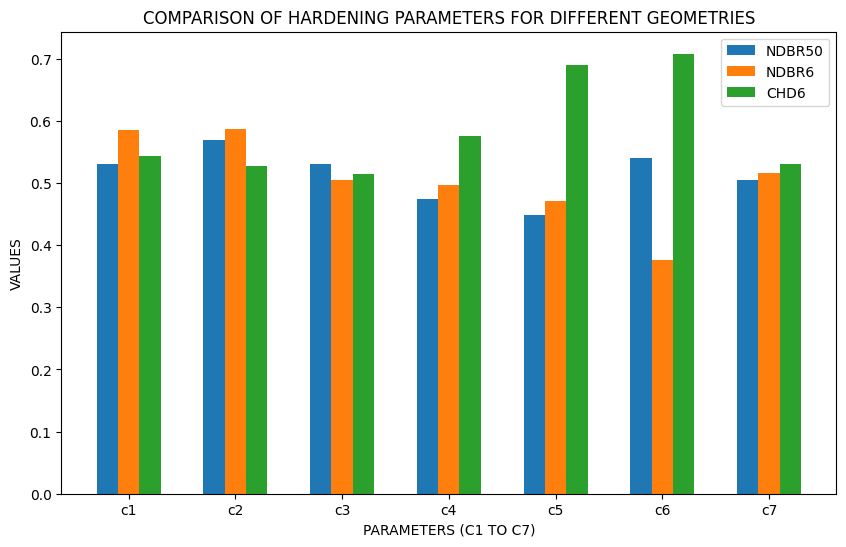

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

paramConfig = {
    'c1': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1.0, 'name': 'W', 'unit': 'dimensionless', 'type': 'hardening'}, 
    'c2': {'lowerBound': 0, 'upperBound': 2, 'exponent': 1000.0, 'name': 'K', 'unit': 'MPa', 'type': 'yielding'}, 
    'c3': {'lowerBound': 0, 'upperBound': 1, 'exponent': 0.1, 'name': 'e0', 'unit': 'dimensionless', 'type': 'hardening'}, 
    'c4': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1.0, 'name': 'n', 'unit': 'dimensionless', 'type': 'hardening'}, 
    'c5': {'lowerBound': 0, 'upperBound': 2, 'exponent': 1000.0, 'name': 'sigma_y', 'unit': 'MPa', 'type': 'yielding'}, 
    'c6': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1000.0, 'name': 'sigma_sat', 'unit': 'MPa', 'type': 'hardening'}, 
    'c7': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1000.0, 'name': 'b', 'unit': 'dimensionless', 'type': 'hardening'}
}

geometries = ['NDBR50', 'NDBR6', 'CHD6']

yieldingIndices = {'NDBR50': 200, 'NDBR6': 200, 'CHD6': 1200}

# Define a simple neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the number of input features, hidden units, and output dimensions
input_size = len(paramConfig)  # Number of input parameters
hidden_size = 64  # Number of hidden units
output_size = input_size  # Number of output dimensions (same as input for this case)

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Define a loss function (mean squared error) and an optimizer (e.g., Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000  # Adjust the number of epochs as needed

# Lists to store loss values for each geometry
loss_lists = {geometry: [] for geometry in geometries}

for geometry in geometries:
    num_samples = yieldingIndices[geometry]  # Use the yielding index for the current geometry

    # Generate random data
    X_train = torch.rand((num_samples, input_size))  # Random input data
    Y_train = torch.rand((num_samples, output_size))  # Random output data

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)

        # Compute the loss
        loss = criterion(outputs, Y_train)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_lists[geometry].append(loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Geometry: {geometry}, Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the loss for each geometry in a single graph
for geometry in geometries:
    plt.plot(loss_lists[geometry], label=f'Geometry: {geometry}')

plt.xlabel('NUMBER OF EPOCHS')
plt.ylabel('VALUE OF LOSS')
plt.legend()
plt.title('TRAINING LOSS FOR DIFF GEOMETRIES OVER 1000 EPOCHS')
plt.show()

# Predict parameters for all geometries
predicted_parameters = {}

for geometry in geometries:
    X_test = torch.rand((1, input_size))
    with torch.no_grad():
        predictions = model(X_test)

    # Convert predictions to a dictionary
    predicted_params = {param: value.item() for param, value in zip(paramConfig.keys(), predictions[0])}
    predicted_parameters[geometry] = predicted_params

# Print predicted parameters for all geometries
for geometry, params in predicted_parameters.items():
    print(f'Predicted parameters for geometry {geometry}:')
    print(params)

# Visualize 'c1' to 'c7' values for each geometry in a single graph with 'c1' to 'c7' on the x-axis
param_names = list(paramConfig.keys())
num_params = len(param_names)

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
x = np.arange(len(param_names))

for i, geometry in enumerate(geometries):
    param_values = [predicted_parameters[geometry][param_name] for param_name in param_names]
    ax.bar(x + i * width, param_values, width=width, label=geometry)

ax.set_xlabel('PARAMETERS (C1 TO C7)')
ax.set_ylabel('VALUES')
ax.set_title('COMPARISON OF HARDENING PARAMETERS FOR DIFFERENT GEOMETRIES')
ax.set_xticks(x + width * (len(geometries) - 1) / 2)
ax.set_xticklabels(param_names)
ax.legend()

plt.show()


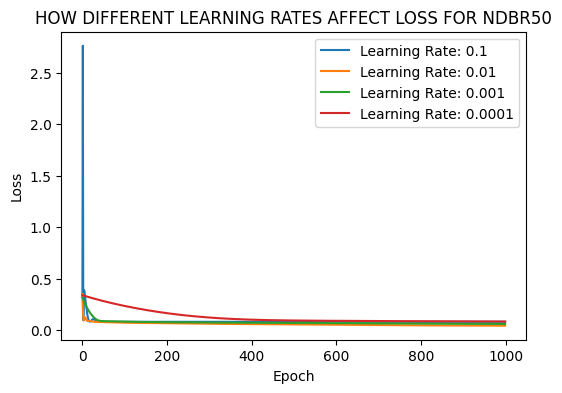

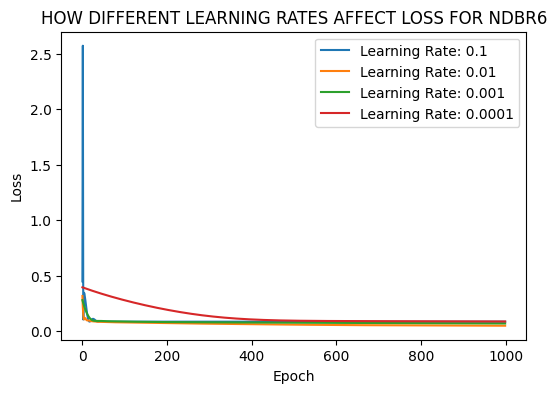

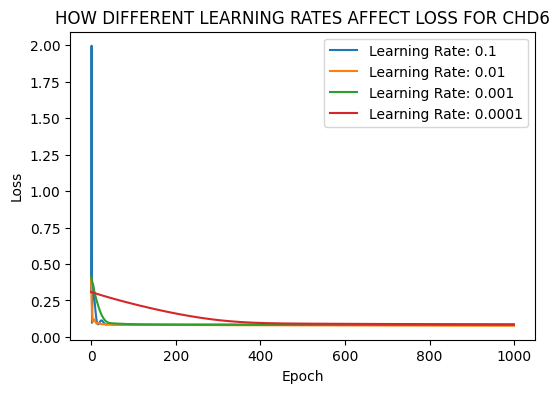

In [71]:
# Define a range of learning rates to experiment with
learning_rates = [0.1, 0.01, 0.001, 0.0001]
lr_losses = {lr: [] for lr in learning_rates}

# Lists to store loss values for each geometry
loss_lists = {geometry: {lr: [] for lr in learning_rates} for geometry in geometries}

for geometry in geometries:
    num_samples = yieldingIndices[geometry]  # Use the yielding index for the current geometry

    # Generate random data
    X_train = torch.rand((num_samples, input_size))  # Random input data
    Y_train = torch.rand((num_samples, output_size))  # Random output data

    for lr in learning_rates:
        # Create a new instance of the neural network
        model = NeuralNetwork(input_size, hidden_size, output_size)

        # Define a new optimizer with the current learning rate
        optimizer = optim.Adam(model.parameters(), lr=lr)

        loss_lists[geometry][lr] = []  # Reset the loss list for the current geometry and learning rate

        for epoch in range(num_epochs):
            # Forward pass
            outputs = model(X_train)

            # Compute the loss
            loss = criterion(outputs, Y_train)

            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_lists[geometry][lr].append(loss.item())

# Plot the loss curves for different learning rates
for geometry in geometries:
    plt.figure(figsize=(6, 4))  # Adjust the figsize for smaller images
    for lr in learning_rates:
        plt.plot(loss_lists[geometry][lr], label=f'Learning Rate: {lr}')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'HOW DIFFERENT LEARNING RATES AFFECT LOSS FOR {geometry}')
    plt.show()


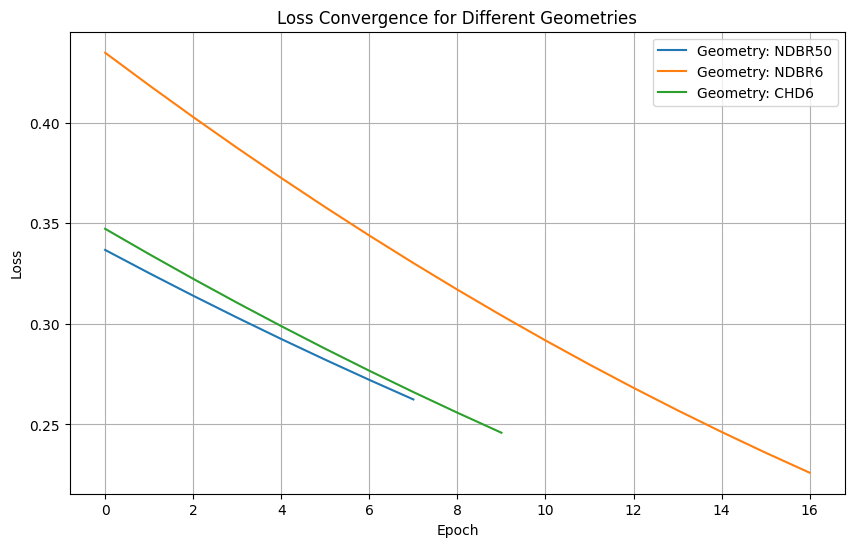

Geometry: NDBR50, Convergence Epoch: 7
Geometry: NDBR6, Convergence Epoch: 16
Geometry: CHD6, Convergence Epoch: 9


In [4]:
# Define the number of epochs and convergence threshold
num_epochs = 1000
convergence_threshold = 0.01  # Adjust this threshold as needed

# Lists to store convergence epochs for each geometry
convergence_epochs = {}

# Create a new figure for the convergence plot
plt.figure(figsize=(10, 6))

for geometry in geometries:
    num_samples = yieldingIndices[geometry]  # Use the yielding index for the current geometry

    # Generate random data
    X_train = torch.rand((num_samples, input_size))  # Random input data
    Y_train = torch.rand((num_samples, output_size))  # Random output data

    # Create a new instance of the neural network
    model = NeuralNetwork(input_size, hidden_size, output_size)

    # Define a new optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Lists to store loss values during training
    loss_values = []

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)

        # Compute the loss
        loss = criterion(outputs, Y_train)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_values.append(loss.item())

        # Check for convergence
        if epoch > 0 and abs(loss_values[epoch] - loss_values[epoch - 1]) < convergence_threshold:
            convergence_epochs[geometry] = epoch
            break

    # Plot the loss curve for the current geometry
    plt.plot(loss_values, label=f'Geometry: {geometry}')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Convergence for Different Geometries')
plt.grid(True)

# Show the convergence plot
plt.show()

# Print convergence epochs for each geometry
for geometry, epoch in convergence_epochs.items():
    print(f'Geometry: {geometry}, Convergence Epoch: {epoch}')

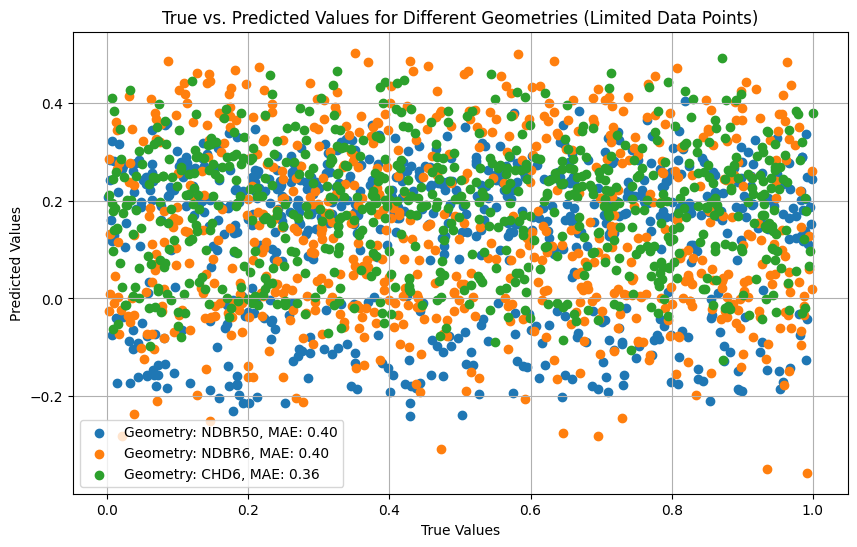

In [68]:
from sklearn.metrics import mean_absolute_error

# Define the number of epochs and other constants
num_epochs = 1000
convergence_threshold = 0.01  
num_samples_per_geometry = 100 

# Create a new figure for the performance metrics plot
plt.figure(figsize=(10, 6))

for geometry in geometries:
    num_samples = min(yieldingIndices[geometry], num_samples_per_geometry)  # Use the yielding index for the current geometry

    # Generate random data
    X_train = torch.rand((num_samples, input_size))  # Random input data
    Y_train = torch.rand((num_samples, output_size))  # Random output data

    # Create a new instance of the neural network
    model = NeuralNetwork(input_size, hidden_size, output_size)

    # Define a new optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Lists to store loss values during training
    loss_values = []

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)

        # Compute the loss
        loss = criterion(outputs, Y_train)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_values.append(loss.item())

        # Check for convergence
        if epoch > 0 and abs(loss_values[epoch] - loss_values[epoch - 1]) < convergence_threshold:
            convergence_epochs[geometry] = epoch
            break

    # Calculate the Mean Absolute Error (MAE) for the current geometry
    with torch.no_grad():
        predictions = model(X_train)
    mae = mean_absolute_error(Y_train.numpy(), predictions.numpy())

    # Plot the true values vs. predicted values
    plt.scatter(Y_train.numpy(), predictions.numpy(), label=f'Geometry: {geometry}, MAE: {mae:.2f}')

# Customize the performance metrics plot
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title(f'True vs. Predicted Values for Different Geometries (Limited Data Points)')
plt.grid(True)

# Show the performance metrics plot
plt.show()
